In [29]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, copy, warnings
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [13]:
data = pd.read_csv("creditcard.csv")  

data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


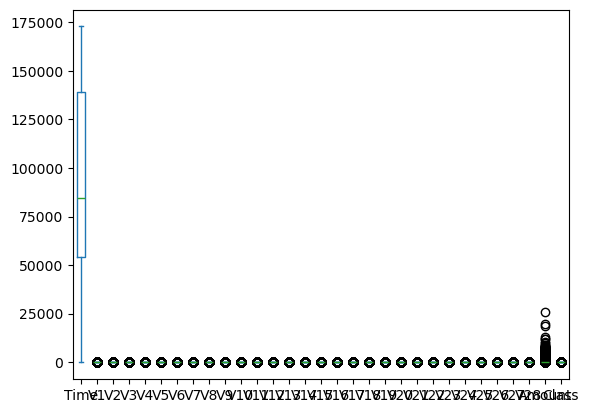

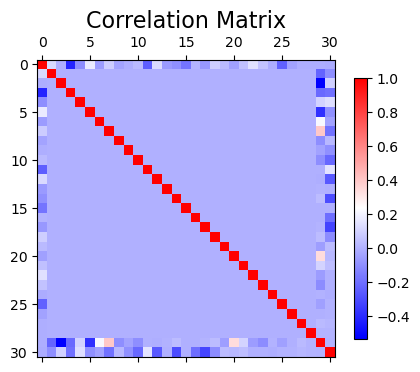

In [14]:
data.plot.box()


# See: features V1, ..., V28 are not correlated as they are the principal components obtained with PCA
plt.matshow(data.corr(), cmap='bwr')
cb = plt.colorbar(shrink=0.7)
plt.title('Correlation Matrix', fontsize=16) 
plt.show()

In [15]:
normal = data[data.Class==0] # Set of all normal (y = 0) cases
fraud = data[data.Class==1]  # Set of all fraud (y = 1) cases


num_normal = normal.shape[0] 
num_fraud = fraud.shape[0] 

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")


ratio = num_normal/num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

Number of normal examples = 284315
Number of fraud examples = 492

normal to fraud ratio in the whole data = 577.88


In [16]:
'A choice of normal_fraud_ratio has effects on precision and recall given below.'

normal_fraud_ratio = 1                                      # normal_fraud_ratio = 1 means balance sample
normal_sample = normal.sample(normal_fraud_ratio*num_fraud) 


# joining row-wise (axis=0) normal and fraud cases to get a sample 
sample = pd.concat([fraud, normal_sample], axis=0)  


for i in range(100):
    sample = np.random.permutation(sample)                   # random shuffling of sample examples 100 times


    
#==============================================================================


X, y = sample[:, :-1], sample[:, -1]

X = MinMaxScaler().fit_transform(X)            # this will put all the feature (X) values in the interval [0,1]

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)


X[:3,:], y[:3]                 

number of examples =  984
number of features =  30


(array([[0.47296763, 0.90427114, 0.33463041, 0.87511574, 0.48811331,
         0.61932643, 0.51200726, 0.81865684, 0.69430466, 0.57848663,
         0.6565388 , 0.32405023, 0.67205951, 0.34692517, 0.71469077,
         0.75997744, 0.68219159, 0.58729726, 0.65252442, 0.60764716,
         0.29618556, 0.4708711 , 0.5471516 , 0.77746811, 0.46654197,
         0.6084979 , 0.36224852, 0.69286633, 0.54788706, 0.00339462],
        [0.90447942, 0.99031705, 0.271074  , 0.88331731, 0.32364958,
         0.67516324, 0.5632808 , 0.87190706, 0.67580049, 0.73875492,
         0.71438685, 0.19838765, 0.93492007, 0.63360216, 0.82253873,
         0.37396144, 0.81115099, 0.77116876, 0.68775495, 0.48928043,
         0.26058979, 0.44589154, 0.44777382, 0.79407308, 0.6271306 ,
         0.65201   , 0.00930776, 0.65257078, 0.50225565, 0.00372197],
        [0.28121692, 0.96500934, 0.2536217 , 0.92110279, 0.27409515,
         0.63936542, 0.52971717, 0.86306974, 0.67617318, 0.64897965,
         0.7387533 , 0.25254638,

In [17]:
''' 
Zero padding is to make the number of features equal to a power of 2.
it is required for 'amplitude encoding' given below.
'''

n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
X = np.append(X, zeros, axis=1)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

(number of qubits, dimension of the Hilbert space) = (5, 32)
number of examples =  984
number of features =  32


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)

(688, 32) (296, 32)


In [19]:
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap


fm = ZZFeatureMap(feature_dimension=num_features, reps=1)                   # ZZFeatureMap seems better
fm.decompose().draw() 


┌───┐┌─────────────┐                                                »
 q_0: ┤ H ├┤ P(2.0*x[0]) ├───■────────────────────────────────────■────■──»
      ├───┤├─────────────┤ ┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
 q_1: ┤ H ├┤ P(2.0*x[1]) ├─┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
      ├───┤├─────────────┤ └───┘└──────────────────────────────┘└───┘┌─┴─┐»
 q_2: ┤ H ├┤ P(2.0*x[2]) ├───────────────────────────────────────────┤ X ├»
      ├───┤├─────────────┤                                           └───┘»
 q_3: ┤ H ├┤ P(2.0*x[3]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_4: ┤ H ├┤ P(2.0*x[4]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_5: ┤ H ├┤ P(2.0*x[5]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_6: ┤ H ├┤ P(2.0*x[6]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_7: ┤ H ├┤ P(2.0*x[7]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_8: ┤ H ├┤ P(2.0*x[8]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_9: ┤ H ├┤ P(2.0*x[9]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┴┐                                               »
q_10: ┤ H ├┤ P(2.0*x[10]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_11: ┤ H ├┤ P(2.0*x[11]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_12: ┤ H ├┤ P(2.0*x[12]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_13: ┤ H ├┤ P(2.0*x[13]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_14: ┤ H ├┤ P(2.0*x[14]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_15: ┤ H ├┤ P(2.0*x[15]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_16: ┤ H ├┤ P(2.0*x[16]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_17: ┤ H ├┤ P(2.0*x[17]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_18: ┤ H ├┤ P(2.0*x[18]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_19: ┤ H ├┤ P(2.0*x[19]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_20: ┤ H ├┤ P(2.0*x[20]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_21: ┤ H ├┤ P(2.0*x[21]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_22: ┤ H ├┤ P(2.0*x[22]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_23: ┤ H ├┤ P(2.0*x[23]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_24: ┤ H ├┤ P(2.0*x[24]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_25: ┤ H ├┤ P(2.0*x[25]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                           

In [20]:
from qiskit_machine_learning.circuit.library import RawFeatureVector


fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw() 

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_2: ┤2 Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31]) ├
«     │                                                                                                                                                                                                                 │
«q_3: ┤3                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                ├
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [21]:
from qiskit.circuit.library import RealAmplitudes


'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

In [31]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load your dataset
data = pd.read_csv("creditcard.csv")

# Data preprocessing
normal = data[data.Class == 0]
fraud = data[data.Class == 1]

# Sample balancing
normal_fraud_ratio = 1
normal_sample = normal.sample(normal_fraud_ratio * len(fraud))
sample = pd.concat([fraud, normal_sample], axis=0)
sample = sample.sample(frac=1).reset_index(drop=True)

X, y = sample.iloc[:, :-1].values, sample.iloc[:, -1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce the number of features to match the number of qubits
X_reduced = X_scaled[:, :2]  # Using only the first two features for simplicity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Step 2: Define the Quantum Device and Circuit
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Define the variational circuit with parameterized gates
def variational_circuit(params, x):
    """Quantum circuit with parameterized rotations."""
    qml.templates.AngleEmbedding(x, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))

# Step 3: Create a QNode
params_shape = (3, n_qubits, 3)  # 3 layers, 2 qubits, 3 parameters per qubit
params = np.random.randn(*params_shape, requires_grad=True)

@qml.qnode(dev)
def circuit(params, x):
    variational_circuit(params, x)
    return qml.expval(qml.PauliZ(0))

# Step 4: Define the Cost Function
def cost(params, X, y):
    predictions = np.array([circuit(params, x) for x in X])
    return np.mean((predictions - y) ** 2)

# Step 5: Train the Variational Classifier
from pennylane.optimize import NesterovMomentumOptimizer

opt = NesterovMomentumOptimizer(stepsize=0.5)
epochs = 20
for epoch in range(epochs):
    params, cost_val = opt.step_and_cost(lambda v: cost(v, X_train, y_train), params)
    print(f"Epoch {epoch + 1}: Cost = {cost_val:.4f}")

# Step 6: Evaluate the Model
predictions = [int(np.sign(circuit(params, x))) for x in X_test]
predictions = np.array([1 if p > 0 else 0 for p in predictions])  # Convert to binary labels

# Calculate accuracy and generate classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Variational Quantum Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Epoch 1: Cost = 0.6464
Epoch 2: Cost = 0.3665
Epoch 3: Cost = 0.3439
Epoch 4: Cost = 0.3173
Epoch 5: Cost = 0.3230
Epoch 6: Cost = 0.3059
Epoch 7: Cost = 0.2931
Epoch 8: Cost = 0.2772
Epoch 9: Cost = 0.2617
Epoch 10: Cost = 0.2543
Epoch 11: Cost = 0.2508
Epoch 12: Cost = 0.2481
Epoch 13: Cost = 0.2472
Epoch 14: Cost = 0.2467
Epoch 15: Cost = 0.2457
Epoch 16: Cost = 0.2443
Epoch 17: Cost = 0.2429
Epoch 18: Cost = 0.2417
Epoch 19: Cost = 0.2408
Epoch 20: Cost = 0.2401
Variational Quantum Classifier Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.03      0.05       146
           1       0.50      0.94      0.65       150

    accuracy                           0.49       296
   macro avg       0.40      0.48      0.35       296
weighted avg       0.40      0.49      0.35       296

